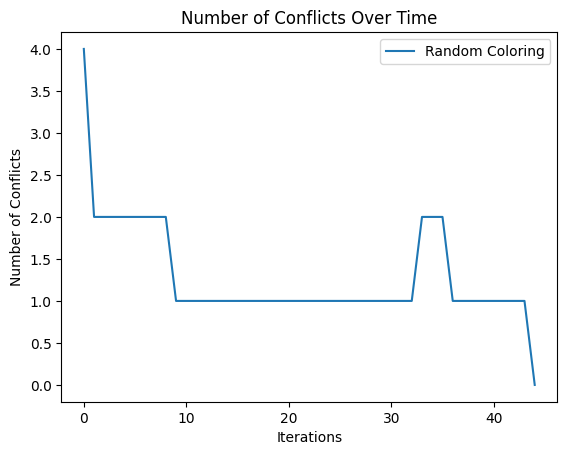

Random Coloring - Final number of conflicts: 0


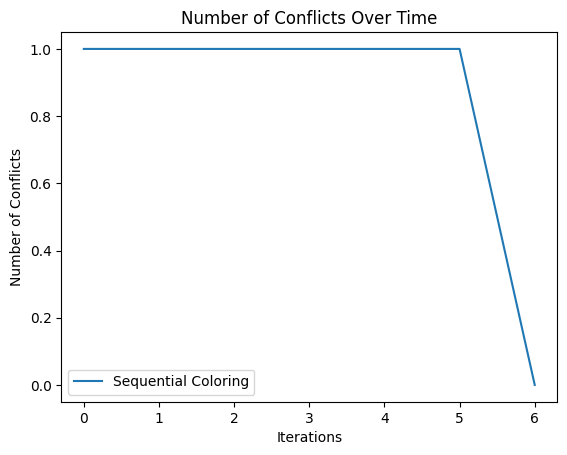

Sequential Coloring - Final number of conflicts: 0


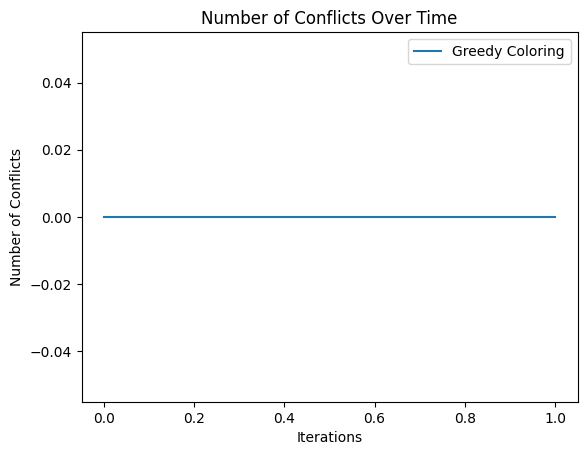

Greedy Coloring - Final number of conflicts: 0


In [11]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def random_graph(n, p):
    """
    Generates a random graph with n nodes and edge probability p.
    """
    return nx.erdos_renyi_graph(n, p)

def random_coloring(graph, num_colors):
    """
    Assigns random colors to each node in the graph.
    """
    colors = {}
    for node in graph.nodes():
        colors[node] = random.randint(0, num_colors - 1)
    return colors

def sequential_coloring(graph, num_colors):
    """
    Assigns colors to nodes sequentially, ensuring no adjacent nodes have the same color.
    """
    colors = {}
    for node in graph.nodes():
        colors[node] = None  # Initialize color for each node

    for node in graph.nodes():
        neighbors = [colors[n] for n in graph.neighbors(node) if colors[n] is not None]  # Exclude uncolored neighbors
        available_colors = [color for color in range(num_colors) if color not in neighbors]
        
        if available_colors:  # Check if available_colors is not empty
            colors[node] = random.choice(available_colors)
        else:
            colors[node] = random.randint(0, num_colors - 1)  # Assign a random color if no available colors
        
    return colors


def greedy_coloring(graph, num_colors):
    """
    Assigns colors to nodes using a greedy algorithm, prioritizing nodes with a higher degree.
    """
    colors = {}
    for node in graph.nodes():
        colors[node] = None  # Initialize color for each node

    nodes = list(graph.nodes())
    nodes.sort(key=lambda x: graph.degree(x), reverse=True)
    for node in nodes:
        neighbors = [colors[n] for n in graph.neighbors(node) if colors[n] is not None]  # Exclude uncolored neighbors
        available_colors = [color for color in range(num_colors) if color not in neighbors]

        if available_colors:  # Check if available_colors is not empty
            colors[node] = random.choice(available_colors)
        else:
            colors[node] = random.randint(0, num_colors - 1)  # Assign a random color if no available colors

    return colors


def conflicts(graph, colors):
    """
    Counts the number of conflicts in the graph coloring.
    A conflict occurs if adjacent nodes have the same color.
    """
    num_conflicts = 0
    for u, v in graph.edges():
        if colors[u] == colors[v]:
            num_conflicts += 1
    return num_conflicts

def search(graph, colors, num_colors, max_iterations):
    """
    Performs a local search algorithm to reduce conflicts in the graph coloring.
    """
    conflicts_list = [conflicts(graph, colors)]
    for _ in range(max_iterations):
        node = random.choice(list(graph.nodes()))
        current_color = colors[node]
        neighbors = list(graph.neighbors(node))
        neighbor_colors = [colors[neighbor] for neighbor in neighbors]

        if isinstance(current_color, int):
            new_color = (current_color + 1) % num_colors
            while new_color in neighbor_colors and len(set(neighbor_colors)) < num_colors:
                new_color = (new_color + 1) % num_colors
        else:
            new_color = random.randint(0, num_colors - 1)

        colors[node] = new_color
        current_conflicts = conflicts(graph, colors)
        conflicts_list.append(current_conflicts)

        if current_conflicts == 0:
            break

    return conflicts_list


def plot_conflicts_over_time(conflicts_list, method):
    """
    Plots the number of conflicts over time for a specific method.
    """
    plt.plot(conflicts_list, label=method)
    plt.xlabel('Iterations')
    plt.ylabel('Number of Conflicts')
    plt.title('Number of Conflicts Over Time')
    plt.legend()
    plt.show()

def main():
    num_nodes = 10
    edge_probability = 0.3
    num_colors = 3
    max_iterations = 100

    graph = random_graph(num_nodes, edge_probability)

    # Random Coloring
    colors_random = random_coloring(graph, num_colors)
    conflicts_list_random = local_search(graph, colors_random, num_colors, max_iterations)
    plot_conflicts_over_time(conflicts_list_random, "Random Coloring")
    print("Random Coloring - Final number of conflicts:", conflicts_list_random[-1])

    # Sequential Coloring
    colors_sequential = sequential_coloring(graph, num_colors)
    conflicts_list_sequential = local_search(graph, colors_sequential, num_colors, max_iterations)
    plot_conflicts_over_time(conflicts_list_sequential, "Sequential Coloring")
    print("Sequential Coloring - Final number of conflicts:", conflicts_list_sequential[-1])

    # Greedy Coloring
    colors_greedy = greedy_coloring(graph, num_colors)
    conflicts_list_greedy = local_search(graph, colors_greedy, num_colors, max_iterations)
    plot_conflicts_over_time(conflicts_list_greedy, "Greedy Coloring")
    print("Greedy Coloring - Final number of conflicts:", conflicts_list_greedy[-1])

if __name__ == "__main__":
    main()
